# Constructiveness by topic in the comments

In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re, math, os
import operator
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
TOPIC_MODELLING_DIR = '/Users/vasundhara/sfuvault/Discourse-Lab/Data/Topic_Modelling/'
DATA_DIR = '/Users/vasundhara/sfuvault/Discourse-Lab/Data/'

THRESHOLD_PROBABILITY = 0.10

SAVE = True
SAVE_FOLDER = 'TACT/img/topics_constructiveness/'
os.makedirs(SAVE_FOLDER, exist_ok=True)

In [3]:
def plotAgainstTopics(x,y):
    sns.set_context('talk')
    sns.set(rc={'figure.figsize':(12,8)})

    fig,ax = plt.subplots(1,1)
    sns.barplot(x, y)#, s=100)
    ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
    labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']
    plt.xlabel('Topics', fontsize=20)
    plt.ylabel('Average constructiveness', fontsize=20)
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)
    plt.ylim([0,0.7])
    ax.tick_params(axis='both', which='major', labelsize=13)
    plt.tight_layout()

    return fig

In [4]:
def getPlottableDataFrame(merged):

    topic_counts = [0] * 15
    topic_constructiveness = [0] * 15

    def getCountsAndConstructiveness(merged_row):
        topic_probabilities = eval(merged_row['topic_probabilities'])

        for topic_prob in topic_probabilities:
            if topic_prob[1] > THRESHOLD_PROBABILITY:
                topic_counts[topic_prob[0]] += 1
                topic_constructiveness[topic_prob[0]] += merged_row['constructive_prediction']

    merged.apply(getCountsAndConstructiveness, axis=1)

    to_plot = (pd.DataFrame(topic_constructiveness) / pd.DataFrame(topic_counts)).reset_index().rename({'index' : 'x', 0 : 'y'}, axis=1)
    
    return to_plot

## SOCC

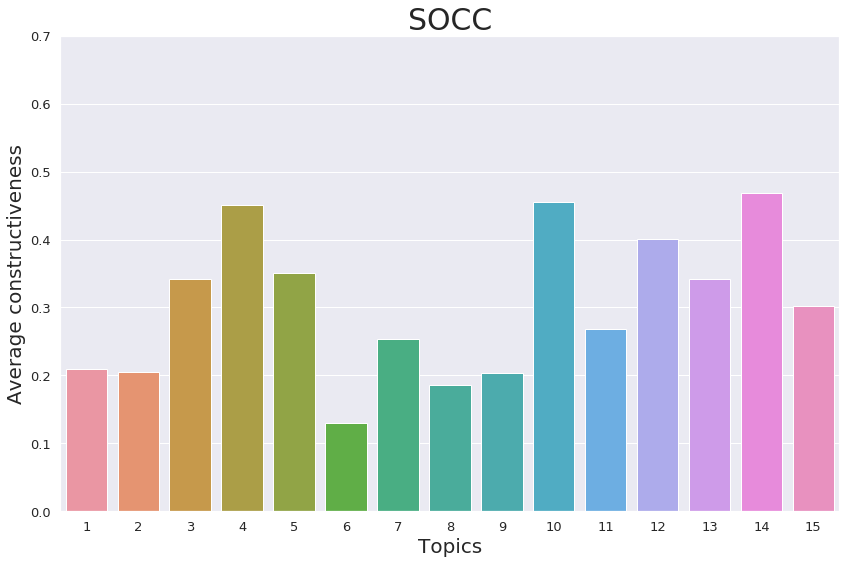

In [5]:
socc_constructiveness = pd.read_csv('/Users/vasundhara/sfuvault/Discourse-Lab/Data/Globe_and_Mail/Globe_analysis/socc_constructiveness_predictions.csv')
socc_predictions = pd.read_csv(TOPIC_MODELLING_DIR+'/results/socc_comments_topics.txt',
                               sep=';', header=None, index_col=0).rename({1 : 'topic_probabilities'},
                                                                         axis=1).reset_index(drop=True)

assert len(socc_constructiveness) == len(socc_predictions)

socc_merged = socc_predictions.merge(socc_constructiveness, left_index=True, right_index=True)

to_plot = getPlottableDataFrame(socc_merged)
fig = plotAgainstTopics(to_plot['x'], to_plot['y'])

plt.title('SOCC', fontsize=30)
plt.tight_layout()

if SAVE:
    plt.savefig(SAVE_FOLDER+'/SOCC.png')
else:
    plt.show()

## The Tyee

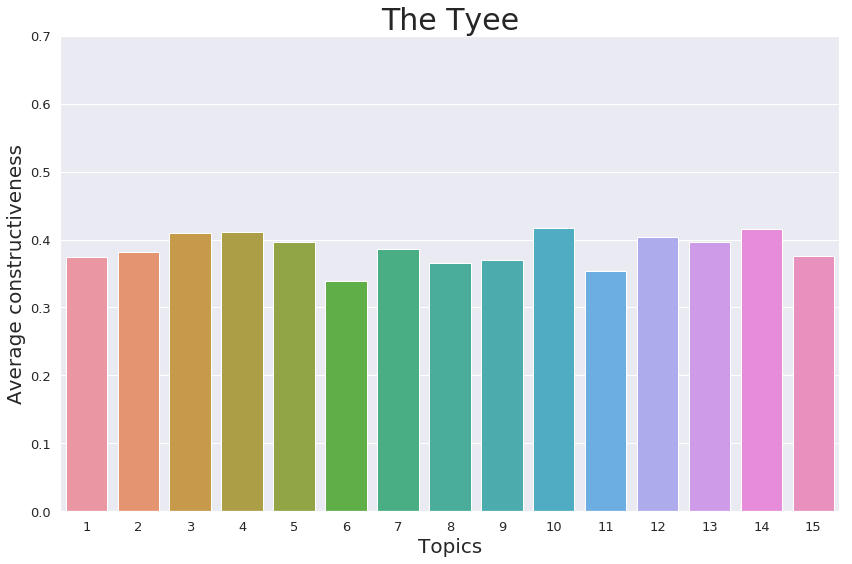

In [6]:
# tyee_constructiveness = pd.read_csv('/Users/vasundhara/sfuvault/Discourse-Lab/Data/The_Tyee_data/Tyee analysis/tyee_constructiveness_results.csv')
# tyee_predictions = pd.read_csv(TOPIC_MODELLING_DIR+'/results/tyee_comments_topics.txt',
#                                sep=';', header=None, index_col=0).rename({1 : 'topic_probabilities'},
#                                                                          axis=1).reset_index(drop=True)

# assert len(tyee_constructiveness) == len(tyee_predictions)

# tyee_merged = tyee_predictions.merge(tyee_constructiveness, left_index=True, right_index=True)

""" to replace """
tyee_constructiveness = pd.read_csv('/Users/vasundhara/sfuvault/Discourse-Lab/Data/The_Tyee_data/Tyee analysis/tyee_constructiveness_results.csv')
tyee_predictions = pd.read_csv(TOPIC_MODELLING_DIR+'/results/tyee_comments_topics.txt',
                               sep=';', header=None, index_col=0).rename({1 : 'topic_probabilities'},
                                                                         axis=1).reset_index(drop=True)
tyee_comments = pd.read_csv('/Users/vasundhara/sfuvault/Discourse-Lab/Data/The_Tyee_data/CSVs/the_tyee_posts_preprocessed.csv',
            low_memory=False)

merged = tyee_comments.merge(tyee_predictions, left_index=True, right_index=True)
tyee_merged = tyee_constructiveness.merge(merged, left_on='pp_comment_text', right_on='message_preprocessed')
""" to replace """

to_plot = getPlottableDataFrame(tyee_merged)
fig = plotAgainstTopics(to_plot['x'], to_plot['y'])

plt.title('The Tyee', fontsize=30)
plt.tight_layout()

if SAVE:
    plt.savefig(SAVE_FOLDER+'/The_Tyee.png')
else:
    plt.show()

## The Conversation

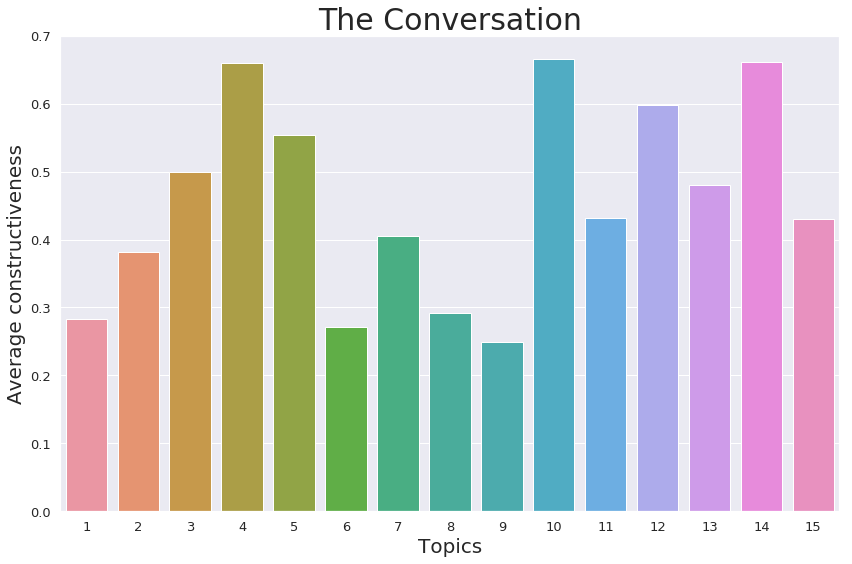

In [7]:
conv_constructiveness = pd.read_csv('/Users/vasundhara/sfuvault/Discourse-Lab/Data/The_Conversation_data/Conversation analysis/conversation_constructiveness_results.csv').dropna()
conv_predictions = pd.read_csv(TOPIC_MODELLING_DIR+'/results/conv_comments_topics.txt',
                               sep=';', header=None, index_col=0).rename({1 : 'topic_probabilities'},
                                                                         axis=1).reset_index(drop=True).drop(11213, axis=0)

assert len(conv_constructiveness) == len(conv_predictions)

conv_merged = conv_predictions.merge(conv_constructiveness, left_index=True, right_index=True)

to_plot = getPlottableDataFrame(conv_merged)
fig = plotAgainstTopics(to_plot['x'], to_plot['y'])

plt.title('The Conversation', fontsize=30)
plt.tight_layout()

if SAVE:
    plt.savefig(SAVE_FOLDER+'/The_Conversation.png')
else:
    plt.show()

## All comments

/anaconda3/envs/usra/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


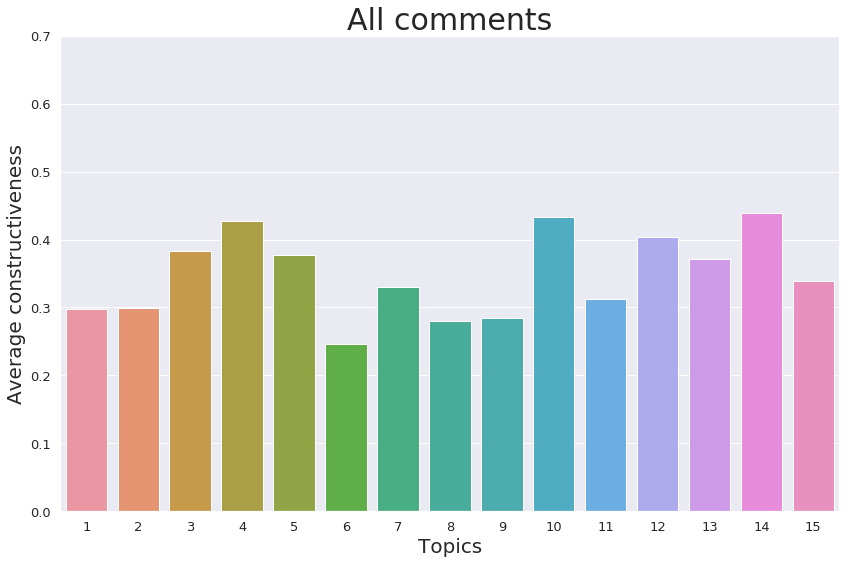

In [8]:
corpora = [conv_merged, socc_merged, tyee_merged]
all_corpora = pd.concat(corpora, axis=0, ignore_index=True, sort=False)

to_plot = getPlottableDataFrame(all_corpora)
fig = plotAgainstTopics(to_plot['x'], to_plot['y'])

plt.title('All comments', fontsize=30)
plt.tight_layout()

if SAVE:
    plt.savefig(SAVE_FOLDER+'/All_comments.png')
else:
    plt.show()

## TukeyHSD exploration

In [9]:
var_val_pairs = []

for i,row in all_corpora.iterrows():
    topic_probabilities = eval(row['topic_probabilities'])
    
    for topic_prob in topic_probabilities:
            if topic_prob[1] > THRESHOLD_PROBABILITY:
                var_val_pairs.append([topic_prob[0], row['constructive_prediction']])

In [10]:
df = pd.DataFrame(var_val_pairs, columns=['variable', 'value'])

In [11]:
posthoc = pairwise_tukeyhsd(df['value'], df['variable'], alpha=0.05)

In [12]:
print(posthoc)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     0.0013  -0.0058  0.0085 False 
  0      2     0.0849   0.0789  0.0909  True 
  0      3     0.1298   0.1244  0.1352  True 
  0      4     0.0792   0.0733  0.0851  True 
  0      5    -0.0522  -0.0615 -0.0429  True 
  0      6     0.0316   0.0253  0.0378  True 
  0      7    -0.0176  -0.0266 -0.0087  True 
  0      8    -0.0136  -0.0216 -0.0056  True 
  0      9     0.1356   0.1302  0.1409  True 
  0      10    0.0141   0.0062  0.0219  True 
  0      11    0.1062   0.1006  0.1118  True 
  0      12    0.0731   0.0665  0.0796  True 
  0      13    0.1409   0.1355  0.1462  True 
  0      14    0.0413   0.0346  0.048   True 
  1      2     0.0836   0.0777  0.0894  True 
  1      3     0.1285   0.1232  0.1338  True 
  1      4     0.0778   0.0721  0.0836  True 
  1      5    -0.0535  -0.0628 -0.0443  True 
  1      6     0.0302   0.024

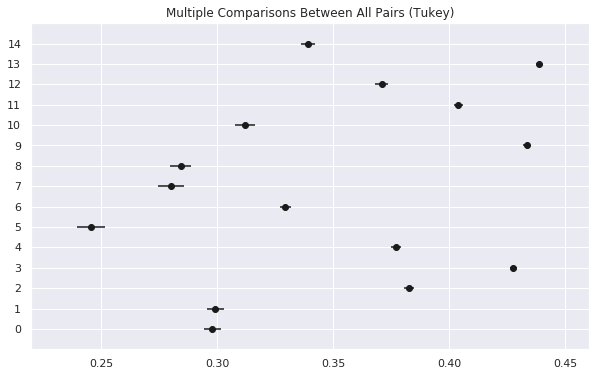

In [13]:
TukeyHSD = posthoc.plot_simultaneous()